# One dimensional Schrödinger Equation

The time-independent Schrodinger equation is:
$$
-\frac{h^2}{2m}\partial^2_x \Psi(x) + V(x)\Psi(x)=E\Psi(x)
$$
with the boundary condition (**Liouville**)Exist an infinite set of eigenvalue
$$
\Psi(0)=\Psi(L)=0
$$
What's beautiful about this is :
- There exist an infinite set of eigenvalue $E_0<E-1<...$ with $E_0$ is the energy of the fondamental state of the system   (many but discrete)
- The corresponmding eigenfunctions are complete. This means that any function $f(x)$ in $[O,L] $ can be constructed as a linear combination of them (e.g. $f\sim \Sigma       a_i\Psi^{(i)}(x)$
- The eigenfucntions are orthognola (in the sense od $L^2(0,L)$ $\int_0^L\Psi^{(i)}(x)\Psi^{(j)}(x) dx$

## Mathematical Formalism
$\hbar=1 ~~ y=x/L~~~$

$$
-\frac{1}{2}\partial^2_y \Psi(x) + m L^2 V(x)\Psi(x)=m L^2E\Psi(x)
$$

with boundary condition $\Psi(y=0)=\Psi(y=1)=0$
This is much easier to tackle numericaly, Defining the potential defined $mL^2V$

Discretizing the second derivative we have:
    $$
    \frac{d^2f}{dx^2}_{x=j \Delta x} =\frac{f_{j+1}-2f_j + f_{j-1}}{\Delta x ^2}
    $$
where $f_j \equiv f(j\Delta x)$ so the Schrodinger eq becomes:
$$
\frac{1}{2} \frac{\psi_{j+1}-2\psi_j + \psi_{j-1}}{\Delta y^2} + mL^2V_j\psi_j=mL^2E \psi_j
$$
We can manipulate it to look like this:
$$
    -\frac{1}{2 \Delta y^2} \psi_{j+1}\left(\frac{1}{\Delta y^2}
 + mL^2 V_j\right) \psi_j -\frac{1}{2\Delta y^2}\psi_{j-1}=mL^2E\psi_j$$

It's like a system of linear equations...

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$

$$ \psi_0 = \psi_N = 0$$

**It's a Toeplitz matrix**
$\lambda= m^2LE$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

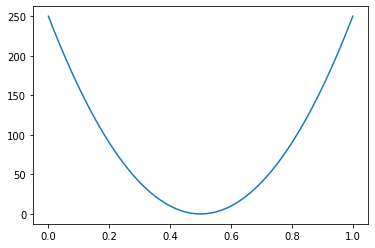

In [3]:
#Define N and dy... N*dy=1
N=200
dy=1/N
y=np.linspace(0,1,N+1)
#Potential ml^V
def mL2V(y):
    return 1000*(y-1/2)**2
plt.plot(y,mL2V(y))

In [10]:
d=1/dy**2 + mL2V(y[1:-1])
e=-1/(2*dy**2)*np.ones(len(d)-1)

In [11]:
w,v =eigh_tridiagonal(d,e)

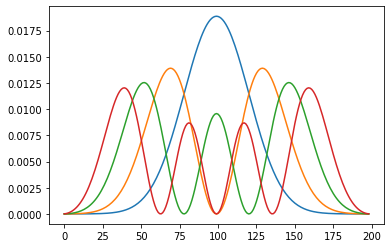

In [12]:
plt.plot(v.T[0]**2)
plt.plot(v.T[1]**2)
plt.plot(v.T[2]**2)
plt.plot(v.T[3]**2)

Text(0, 0.5, '$mL^2 E/\\hbar^2$')

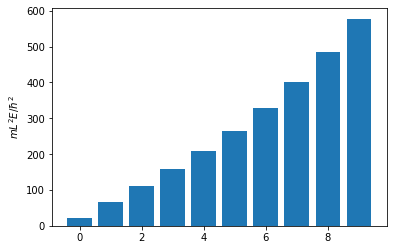

In [16]:
plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2 E/\hbar^2$')

In [9]:
w[0:2]

array([-79977.63864286, -79932.88112756])

In [165]:
def new_Pot(y):
    return 100*np.exp(-(y-0.8)**2/(2*0.005)**2)+170*np.exp(-(y-0.2)**2/(2*0.005)**2)+200*np.exp(-(y-0.5)**2/(2*0.07)**2)

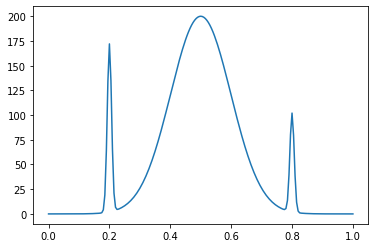

In [166]:
plt.plot(y,new_Pot(y))

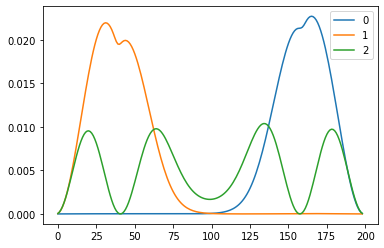

In [167]:
d=1/dy**2 + new_Pot(y[1:-1])
e=-1/(2*dy**2)*np.ones(len(d)-1)
w,v =eigh_tridiagonal(d,e)
plt.plot(v.T[0]**2, label='0')
plt.plot(v.T[1]**2,label='1')
plt.plot(v.T[2]**2,label='2')
#plt.plot(v.T[3]**2,label='3')

plt.legend()
plt.show()

Text(0, 0.5, '$mL^2 E/\\hbar^2$')

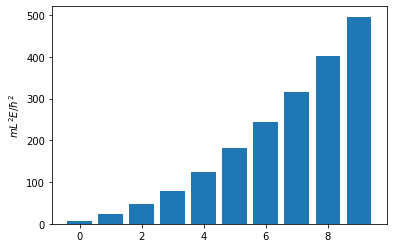

In [113]:
plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2 E/\hbar^2$')